In [1]:
%pip install fastMONAI
from fastMONAI.vision_all import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.8/172.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 62.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is compat

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/MyDrive/Datasets/datasetT1_10.csv')

Mounted at /content/gdrive


In [3]:
df

,t1_path,subject_id,age_at_scan,age
0,/content/gdrive/MyDrive/Datasets/T1Restore10/sub-CC00051XX02_ses-7702_desc-restore_T1w.nii.gz,7702,40.00,40
1,/content/gdrive/MyDrive/Datasets/T1Restore10/sub-CC00052XX03_ses-8300_desc-restore_T1w.nii.gz,8300,38.71,38
2,/content/gdrive/MyDrive/Datasets/T1Restore10/sub-CC00053XX04_ses-8607_desc-restore_T1w.nii.gz,8607,40.43,40
3,/content/gdrive/MyDrive/Datasets/T1Restore10/sub-CC00054XX05_ses-8800_desc-restore_T1w.nii.gz,8800,42.14,42
4,/content/gdrive/MyDrive/Datasets/T1Restore10/sub-CC00055XX06_ses-9300_desc-restore_T1w.nii.gz,9300,40.43,40
5,/content/gdrive/MyDrive/Datasets/T1Restore10/sub-CC00056XX07_ses-10700_desc-restore_T1w.nii.gz,10700,41.14,41
6,/content/gdrive/MyDrive/Datasets/T1Restore10/sub-CC00057XX08_ses-11002_desc-restore_T1w.nii.gz,11002,41.29,41
7,/content/gdrive/MyDrive/Datasets/T1Restore10/sub-CC00060XX03_ses-12501_desc-restore_T1w.nii.gz,12501,40.29,40
8,/content/gdrive/MyDrive/Datasets/T1Restore10/sub-CC00062XX05_ses-13801_desc-restore_T1w.nii.gz,13801,41.57,41
9,/content/gdrive/MyDrive/Datasets/T1Restore10/sub-CC00063AN06_ses-15102_desc-restore_T1w.nii.gz,15102,35.71,35


In [4]:
df.age.min(), df.age.max(), df.age.mean()

(35, 42, 39.8)

In [5]:
import matplotlib.pyplot as plt

(array([0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 4., 3., 1., 0., 0., 0.]),
 array([29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42., 43., 44., 45., 46.]),
 <BarContainer object of 17 artists>)

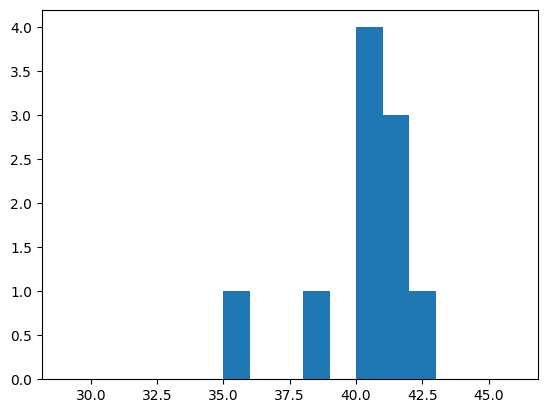

In [6]:
plt.hist(df['age'], bins = 17, range = [29,46])

In [7]:
med_dataset = MedDataset(path= '/content/gdrive/MyDrive/Datasets/T1Restore10', max_workers=12)
data_info_df = med_dataset.summary()

In [8]:
data_info_df.head()

,dim_0,dim_1,dim_2,voxel_0,voxel_1,voxel_2,orientation,example_path,total
0,217,290,290,0.5,0.5,0.5,RAS+,/content/gdrive/MyDrive/Datasets/T1Restore10/sub-CC00051XX02_ses-7702_desc-restore_T1w.nii.gz,10


In [9]:
resample, reorder = med_dataset.suggestion()
resample, reorder

([0.5, 0.5, 0.5], False)

In [10]:
img_size = med_dataset.get_largest_img_size(resample=resample)
img_size

[217.0, 290.0, 290.0]

In [11]:

bs=4
item_tfms = [ZNormalization(), PadOrCrop(img_size), RandomAffine(scales=0, degrees=5, isotropic=False)] 
dblock = MedDataBlock(blocks=(ImageBlock(cls=MedImage), RegressionBlock), 
                      splitter=RandomSplitter(seed=32),
                      get_x=ColReader('t1_path'),
                      get_y=ColReader('age'),
                      item_tfms=item_tfms,
                      reorder=reorder,
                      resample=resample) 

In [12]:
dls = dblock.dataloaders(df, bs=bs)

In [13]:
len(dls.train_ds.items), len(dls.valid_ds.items)

(8, 2)

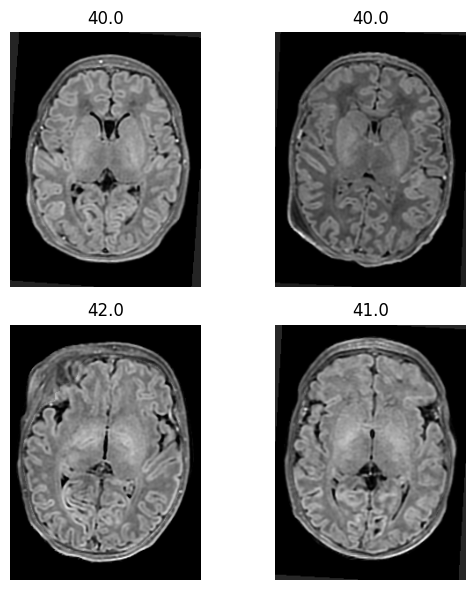

In [14]:
dls.show_batch(anatomical_plane=2)

In [15]:
from monai.networks.nets import Regressor

model = Regressor(in_shape=[1,217, 290, 290], out_shape=1, channels=(16, 32, 64, 128, 256),strides=(2, 2, 2, 2), kernel_size=3, num_res_units=2)

In [16]:
loss_func = L1LossFlat()
learn = Learner(dls, model, loss_func=loss_func, metrics=[mae])
learn.summary()

Regressor (Input shape: 4 x 1 x 217 x 290 x 290)
Layer (type)         Output Shape         Param #    Trainable 
                     4 x 16 x 109 x 145  
Conv3d                                    448        True      
InstanceNorm3d                            0          False     
PReLU                                     1          True      
Conv3d                                    6928       True      
InstanceNorm3d                            0          False     
PReLU                                     1          True      
Conv3d                                    448        True      
____________________________________________________________________________
                     4 x 32 x 55 x 73 x  
Conv3d                                    13856      True      
InstanceNorm3d                            0          False     
PReLU                                     1          True      
Conv3d                                    27680      True      
InstanceNorm3d        

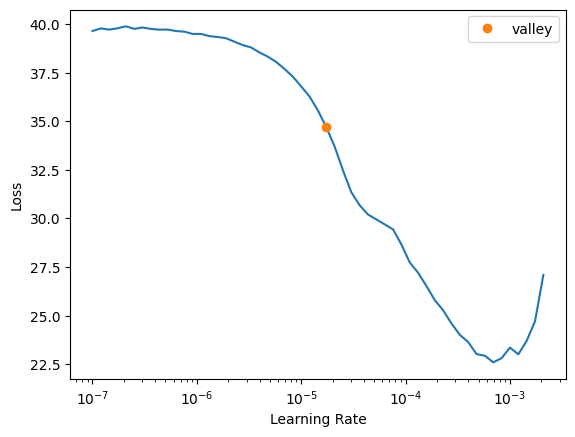

In [17]:
lr = learn.lr_find()

In [18]:
print(lr.valley)

1.737800812406931e-05


In [19]:
learn.fit_one_cycle(4, lr.valley)

epoch,train_loss,valid_loss,mae,time
0,39.785408,36.088211,36.088211,02:44
1,38.256630,30.230976,30.230976,02:35
2,35.541683,24.970261,24.970261,02:38
3,32.743713,23.078602,23.078602,02:32


In [20]:
learn.save('model-brainage');
learn.load('model-brainage'); 


In [21]:
interp = Interpretation.from_learner(learn)

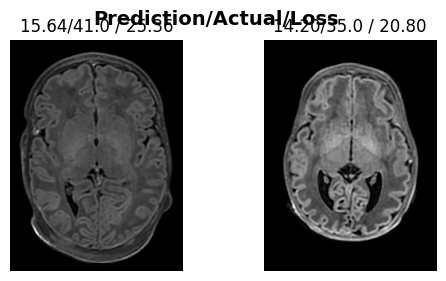

In [22]:
interp.plot_top_losses(k=2, anatomical_plane=2)